In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import warnings
warnings.filterwarnings("ignore")

In [2]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cpu


In [3]:
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv("1966-2016.csv")

In [5]:
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,PADDY HARVEST PRICE (Rs per Quintal),WHEAT HARVEST PRICE (Rs per Quintal),MAIZE HARVEST PRICE (Rs per Quintal),GROUNDNUT HARVEST PRICE (Rs per Quintal)
0,7,1966,6,Madhya Pradesh,Jabalpur,-1.0,-1.0,85.4,-1.0
1,7,1967,6,Madhya Pradesh,Jabalpur,-1.0,93.8,78.3,-1.0
2,7,1968,6,Madhya Pradesh,Jabalpur,-1.0,84.2,56.4,-1.0
3,7,1969,6,Madhya Pradesh,Jabalpur,-1.0,91.5,78.0,-1.0
4,7,1970,6,Madhya Pradesh,Jabalpur,-1.0,77.7,43.7,-1.0


In [6]:
df.isna().sum() / df.shape[0]

Dist Code                                   0.0
Year                                        0.0
State Code                                  0.0
State Name                                  0.0
Dist Name                                   0.0
PADDY HARVEST PRICE (Rs per Quintal)        0.0
WHEAT HARVEST PRICE (Rs per Quintal)        0.0
MAIZE HARVEST PRICE (Rs per Quintal)        0.0
GROUNDNUT HARVEST PRICE (Rs per Quintal)    0.0
dtype: float64

In [7]:
df.drop(["State Code", "Dist Code", "Dist Name"], axis=1, inplace=True)

In [8]:
df.replace(-1, np.nan, inplace=True)

In [9]:
df.isna().sum() / df.shape[0]

Year                                        0.000000
State Name                                  0.000000
PADDY HARVEST PRICE (Rs per Quintal)        0.534820
WHEAT HARVEST PRICE (Rs per Quintal)        0.260253
MAIZE HARVEST PRICE (Rs per Quintal)        0.405037
GROUNDNUT HARVEST PRICE (Rs per Quintal)    0.448665
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7266 entries, 0 to 7265
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      7266 non-null   int64  
 1   State Name                                7266 non-null   object 
 2   PADDY HARVEST PRICE (Rs per Quintal)      3380 non-null   float64
 3   WHEAT HARVEST PRICE (Rs per Quintal)      5375 non-null   float64
 4   MAIZE HARVEST PRICE (Rs per Quintal)      4323 non-null   float64
 5   GROUNDNUT HARVEST PRICE (Rs per Quintal)  4006 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 340.7+ KB


In [11]:
df["State Name"].unique()

array(['Madhya Pradesh', 'Andhra Pradesh', 'Maharashtra', 'Rajasthan',
       'Uttar Pradesh'], dtype=object)

In [12]:
up_df = df[df["State Name"] == "Uttar Pradesh"]
ap_df = df[df["State Name"] == "Andhra Pradesh"]
mh_df = df[df["State Name"] == "Maharashtra"]
raj_df = df[df["State Name"] == "Rajasthan"]
mp_df = df[df["State Name"] == "Madhya Pradesh"]

## I will remove UP as there are very high missing values

In [13]:
ap_df.head()

,Year,State Name,PADDY HARVEST PRICE (Rs per Quintal),WHEAT HARVEST PRICE (Rs per Quintal),MAIZE HARVEST PRICE (Rs per Quintal),GROUNDNUT HARVEST PRICE (Rs per Quintal)
1857,1966,Andhra Pradesh,47.6,NaN,NaN,98.7
1858,1967,Andhra Pradesh,57.7,102.4,NaN,73.9
1859,1968,Andhra Pradesh,62.7,90.0,NaN,91.8
1860,1969,Andhra Pradesh,55.6,NaN,NaN,104.5
1861,1970,Andhra Pradesh,53.8,NaN,NaN,106.7


In [14]:
ap_df.isna().sum() / up_df.shape[0]

## Will take all the crops

Year                                        0.000000
State Name                                  0.000000
PADDY HARVEST PRICE (Rs per Quintal)        0.002246
WHEAT HARVEST PRICE (Rs per Quintal)        0.243486
MAIZE HARVEST PRICE (Rs per Quintal)        0.147350
GROUNDNUT HARVEST PRICE (Rs per Quintal)    0.026505
dtype: float64

In [15]:
ap_df.head()

,Year,State Name,PADDY HARVEST PRICE (Rs per Quintal),WHEAT HARVEST PRICE (Rs per Quintal),MAIZE HARVEST PRICE (Rs per Quintal),GROUNDNUT HARVEST PRICE (Rs per Quintal)
1857,1966,Andhra Pradesh,47.6,NaN,NaN,98.7
1858,1967,Andhra Pradesh,57.7,102.4,NaN,73.9
1859,1968,Andhra Pradesh,62.7,90.0,NaN,91.8
1860,1969,Andhra Pradesh,55.6,NaN,NaN,104.5
1861,1970,Andhra Pradesh,53.8,NaN,NaN,106.7


In [16]:
ap_df.shape

(561, 6)

In [17]:
mp_df.isna().sum() / up_df.shape[0]

## I will take only Wheat and Maize

Year                                        0.000000
State Name                                  0.000000
PADDY HARVEST PRICE (Rs per Quintal)        0.631177
WHEAT HARVEST PRICE (Rs per Quintal)        0.072327
MAIZE HARVEST PRICE (Rs per Quintal)        0.265049
GROUNDNUT HARVEST PRICE (Rs per Quintal)    0.440252
dtype: float64

In [18]:
raj_df.isna().sum() / up_df.shape[0]

## Will take Wheat, Maize and Groundnut

Year                                        0.000000
State Name                                  0.000000
PADDY HARVEST PRICE (Rs per Quintal)        0.464510
WHEAT HARVEST PRICE (Rs per Quintal)        0.021563
MAIZE HARVEST PRICE (Rs per Quintal)        0.133872
GROUNDNUT HARVEST PRICE (Rs per Quintal)    0.119048
dtype: float64

In [19]:
cleaned_ap_df = ap_df.copy()  # Create a copy to avoid modifying the original dataframe

cleaned_ap_df[["PADDY HARVEST PRICE (Rs per Quintal)",
               "WHEAT HARVEST PRICE (Rs per Quintal)",
               "MAIZE HARVEST PRICE (Rs per Quintal)",
               "GROUNDNUT HARVEST PRICE (Rs per Quintal)"]] = cleaned_ap_df[
                   ["PADDY HARVEST PRICE (Rs per Quintal)",
                    "WHEAT HARVEST PRICE (Rs per Quintal)",
                    "MAIZE HARVEST PRICE (Rs per Quintal)",
                    "GROUNDNUT HARVEST PRICE (Rs per Quintal)"]
               ].bfill()

In [20]:
cleaned_ap_df.isna().sum()

Year                                         0
State Name                                   0
PADDY HARVEST PRICE (Rs per Quintal)         0
WHEAT HARVEST PRICE (Rs per Quintal)        16
MAIZE HARVEST PRICE (Rs per Quintal)         0
GROUNDNUT HARVEST PRICE (Rs per Quintal)     0
dtype: int64

In [21]:
cleaned_ap_df[cleaned_ap_df["WHEAT HARVEST PRICE (Rs per Quintal)"].isna()]

,Year,State Name,PADDY HARVEST PRICE (Rs per Quintal),WHEAT HARVEST PRICE (Rs per Quintal),MAIZE HARVEST PRICE (Rs per Quintal),GROUNDNUT HARVEST PRICE (Rs per Quintal)
2402,2001,Andhra Pradesh,603.0,NaN,499.0,1343.0
2403,2002,Andhra Pradesh,635.0,NaN,513.0,1683.0
2404,2003,Andhra Pradesh,630.0,NaN,506.0,1467.0
2405,2004,Andhra Pradesh,586.0,NaN,495.0,1580.0
2406,2005,Andhra Pradesh,624.0,NaN,500.0,1411.0
2407,2006,Andhra Pradesh,707.0,NaN,598.0,2023.0
2408,2007,Andhra Pradesh,698.0,NaN,638.0,2314.0
2409,2008,Andhra Pradesh,874.0,NaN,817.0,2311.0
2410,2009,Andhra Pradesh,1060.0,NaN,879.0,2655.0
2411,2010,Andhra Pradesh,992.0,NaN,950.0,2670.0


In [22]:
cleaned_ap_df['WHEAT HARVEST PRICE (Rs per Quintal)'].fillna(cleaned_ap_df['WHEAT HARVEST PRICE (Rs per Quintal)'].mean(), inplace=True)

In [23]:
cleaned_ap_df.isna().sum()

Year                                        0
State Name                                  0
PADDY HARVEST PRICE (Rs per Quintal)        0
WHEAT HARVEST PRICE (Rs per Quintal)        0
MAIZE HARVEST PRICE (Rs per Quintal)        0
GROUNDNUT HARVEST PRICE (Rs per Quintal)    0
dtype: int64

In [24]:
cleaned_ap_df.shape

(561, 6)

In [25]:
cleaned_ap_df = cleaned_ap_df.groupby(["Year", "State Name"]).mean().reset_index()

In [26]:
cleaned_ap_df.shape

(51, 6)

In [27]:
cleaned_ap_df.head()

,Year,State Name,PADDY HARVEST PRICE (Rs per Quintal),WHEAT HARVEST PRICE (Rs per Quintal),MAIZE HARVEST PRICE (Rs per Quintal),GROUNDNUT HARVEST PRICE (Rs per Quintal)
0,1966,Andhra Pradesh,51.045455,406.127273,337.409091,119.663636
1,1967,Andhra Pradesh,61.118182,406.127273,337.409091,92.609091
2,1968,Andhra Pradesh,59.036364,405.000000,337.409091,100.572727
3,1969,Andhra Pradesh,57.290909,407.790909,337.409091,121.945455
4,1970,Andhra Pradesh,59.227273,407.790909,337.409091,132.009091


In [28]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [29]:
cleaned_ap_df.set_index("Year")

,State Name,PADDY HARVEST PRICE (Rs per Quintal),WHEAT HARVEST PRICE (Rs per Quintal),MAIZE HARVEST PRICE (Rs per Quintal),GROUNDNUT HARVEST PRICE (Rs per Quintal)
Year,,,,,
1966,Andhra Pradesh,51.045455,406.127273,337.409091,119.663636
1967,Andhra Pradesh,61.118182,406.127273,337.409091,92.609091
1968,Andhra Pradesh,59.036364,405.000000,337.409091,100.572727
1969,Andhra Pradesh,57.290909,407.790909,337.409091,121.945455
1970,Andhra Pradesh,59.227273,407.790909,337.409091,132.009091
1971,Andhra Pradesh,65.672727,407.790909,337.972727,122.781818
1972,Andhra Pradesh,78.636364,407.790909,339.936364,178.072727
1973,Andhra Pradesh,91.800000,407.790909,340.818182,217.045455
1974,Andhra Pradesh,118.945455,408.836364,369.109091,225.172727


In [30]:
new_cleaned_ap_df = cleaned_ap_df.copy()

In [31]:
# numeric_cols = new_cleaned_ap_df.select_dtypes(include=['int', 'float']).columns

# # Apply scaling only to numeric columns
# new_cleaned_ap_df[numeric_cols] = scaler.fit_transform(new_cleaned_ap_df[numeric_cols])

In [32]:
## for each district we have 17 years of data
ap_paddy_df = new_cleaned_ap_df["PADDY HARVEST PRICE (Rs per Quintal)"]

# ap_wheat_df = new_cleaned_ap_df[["Year", "WHEAT HARVEST PRICE (Rs per Quintal)"]]

# ap_maize_df = new_cleaned_ap_df[["Year", "MAIZE HARVEST PRICE (Rs per Quintal)"]]

# ap_groundnut_df = new_cleaned_ap_df[["Year", "GROUNDNUT HARVEST PRICE (Rs per Quintal)"]]

In [33]:
# ap_paddy_df = ap_paddy_df.set_index("Year")

In [34]:
ap_paddy_df.head()

0    51.045455
1    61.118182
2    59.036364
3    57.290909
4    59.227273
Name: PADDY HARVEST PRICE (Rs per Quintal), dtype: float64

In [35]:
scaled_ap_paddy_df = scaler.fit_transform(ap_paddy_df.values.reshape(-1, 1))

In [38]:
scaled_ap_paddy_df.shape

(51, 1)

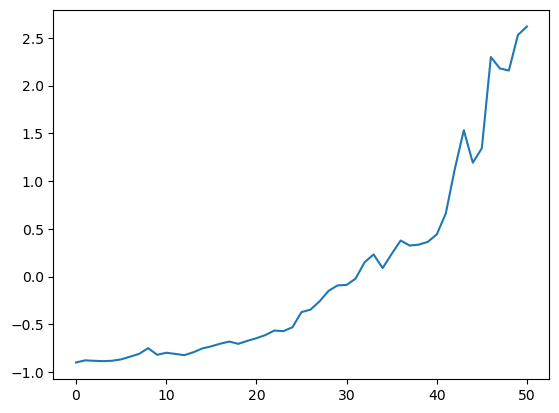

In [41]:
plt.plot(scaled_ap_paddy_df)

In [ ]:
# (np.array(scaled_ap_paddy_df)).shape

(51,)

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [75]:
# Fit an Exponential Smoothing model
model = ExponentialSmoothing(scaled_ap_paddy_df, trend="add", seasonal=None)
model_fit = model.fit(
    smoothing_level=0.6,   # alpha (controls level smoothing)
    smoothing_slope=0.75   # beta (controls trend smoothing)
)
    # smoothing_seasonal=0.5 # gamma (controls seasonal smoothing)



In [76]:
# Forecast next year's scaled price
future_scaled_price = model_fit.forecast(steps=1)

# Reshape for inverse transformation
future_scaled_price = np.array(future_scaled_price).reshape(-1, 1)

# Inverse transform to get the original price
future_original_price = scaler.inverse_transform(future_scaled_price)

print("Predicted price of paddy for next year :", future_original_price[0][0])

Predicted price of paddy for next year : 1716.2968869556457


######